# Бостон датасет

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, SGDRegressor

from sklearn.metrics import classification_report

import sklearn
print(sklearn.__version__)


1.5.1


### Датасет бостонские дома 

CRIM – уровень преступности\
ZN – доля земель под жилую застройку\
INDUS – доля акров, не связанных с розничной торговлей в расчете на город\
CHAS – 1, если граничит с рекой\
NOX – концентрация оксида азота\
RM – среднее количество комнат на доме\
AGE – доля жилых домов, построенных до 1940 года\
DIS – взвешенные расстояния до пяти бостонских центров занятости\
RAD – индекс доступности магистралей\
TAX – полная ставка налога на имущество\
PTRATIO – соотношение учеников и учителей по городам\
B – доля лиц афроамериканского происхождения\
LSTAT – процент населения с более низким статусом\
MEDV – медианная стоимость домов (в тыс. долларов)

[Исходный файл](http://lib.stat.cmu.edu/datasets/boston)

Можно использовать датасет sklearn.datasets.load_boston пока он там есть :)

Задача спрогнозироать цену MEDV.

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

array = np.concatenate((data,target.reshape(-1,1)),  axis=1)
df =pd.DataFrame(array, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
                                  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


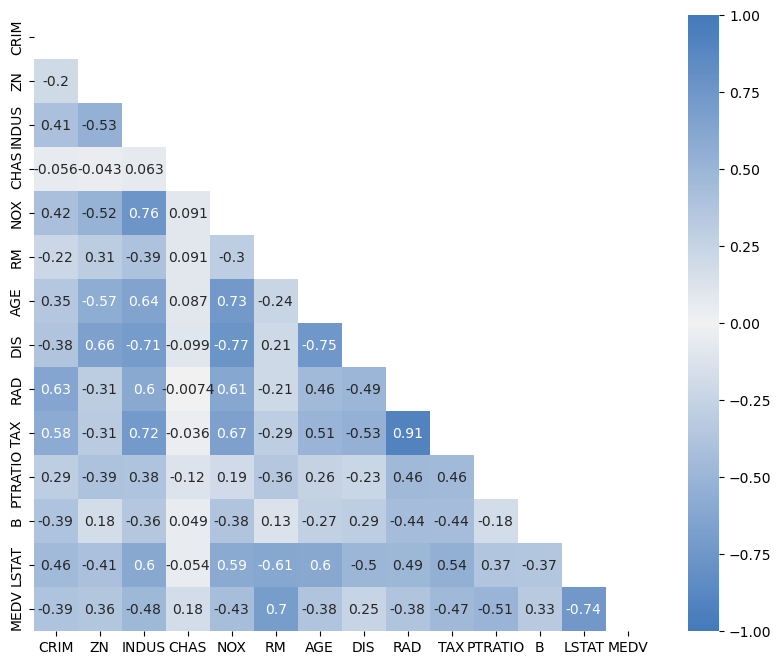

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax);